In [1]:
# ls

In [2]:
# path='test1.xlsx'

In [1]:
import pandas as pd

In [2]:
# kind_sheet=pd.read_excel(path,'K（物料）')
# kind_sheet.columns=['A','B','C','D','E','F','G','H','I','J','K']

In [3]:
# kind_sheet.head(10)

In [4]:
kind_sheet=pd.read_csv('龙钢运输量表_final.csv')

In [5]:
kind_sheet.head()

,流转类型,运输方式,来源单元,到达单元,物质名称,物质品类,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,日运输量新,车辆折算系数
0,钢扎,公路,老炼钢,二棒,钢坯,粗钢,140.56,0.401600,43,40,40,43,47,49,81.959184,4.062712
1,铁前,公路,炼焦厂_1,炼铁1-4,焦炭,主产品,139.79,0.399400,31,9,9,31,47,97,41.175258,4.062712
2,铁前,公路,炼焦厂_1,炼铁5,焦炭,主产品,121.42,0.346914,31,48,48,31,22,12,289.095238,1.901695
3,钢扎,公路,新炼钢,高线,钢坯,粗钢,119.54,0.341543,32,42,42,32,33,34,100.453782,2.852542
4,铁前,公路,原料场,石灰厂,石灰石,熔剂,117.86,0.336743,3,15,15,3,12,95,35.446617,1.037288


In [6]:
# kind=kind_sheet['A'][1:]
o1=kind_sheet['重车起点']
d1=kind_sheet['重车终点']
o2=kind_sheet['空车起点']
d2=kind_sheet['空车终点']
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
E=kind_sheet['车辆折算系数']
Q=kind_sheet['日运输量新']
cap=kind_sheet['运输车辆的最大装载量']

In [7]:
# kind=kind_sheet['A'][1:]
# o1=kind_sheet['C'][1:]
# d1=kind_sheet['D'][1:]
# o2=kind_sheet['J'][1:]
# d2=kind_sheet['K'][1:]
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
# E=kind_sheet['G'][1:]
# Q=kind_sheet['E'][1:]
# cap=kind_sheet['F'][1:]

In [8]:
Amounts1=kind_sheet['车次']
Amounts2=kind_sheet['车次']

In [9]:
Amounts1.head()

0    49
1    97
2    12
3    34
4    95
Name: 车次, dtype: int64

In [10]:
# type(o1)

In [11]:
# kind

In [45]:
l=pd.read_csv('distance.csv',header=None) #读取各个路段长度
# a=pd.read_csv('A（可达矩阵）') #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
MSF=pd.read_csv('MSF.csv',header=None)#,'B2:K11');#读取路段的最大服务交通量
FHV=pd.read_csv('FHV.csv',header=None)#,'B2:K11');#读取交通组成修正系数
FD=pd.read_csv('FD.csv',header=None)#,'B2:K11');  #读取方向分布修正系数
FW=pd.read_csv('FW.csv',header=None)#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
FF=pd.read_csv('FF.csv',header=None)#,'B2:K11');  #读取路测干扰修正系数


In [46]:
FW.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.00009,1.00000,1.00000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
1,1.00000,0.00009,0.00009,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
2,1.00000,0.00009,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
3,0.00009,0.00009,1.00000,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
4,0.00009,1.00000,0.00009,1.00000,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009


In [13]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,394.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,394.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,113.0,0.0,358.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,251.0,0.0,358.0,0.0,357.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
MSF.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,420.0,420.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,420.0,1.0,1.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,420.0,1.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,420.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,420.0,1.0,420.0,1.0,420.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
ot=pd.DataFrame(o1.values.tolist())
dt=pd.DataFrame(d1.values.tolist())

In [16]:
ot.head()

,0
0,43
1,31
2,31
3,32
4,3


In [17]:
dt.head()

,0
0,40
1,9
2,48
3,42
4,15


In [18]:
type(dt)

pandas.core.frame.DataFrame

In [19]:
type(dt.iloc[:,0])

pandas.core.series.Series

In [20]:
FF.head(20)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.00,0.95,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.95,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.95,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.00,1.00,0.95,1.00,0.95,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.00,0.95,1.00,0.95,1.00,0.95,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.00,1.00,1.00,1.00,0.95,1.00,0.95,0.95,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,0.95,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,0.95,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 


In [22]:
# c2.head(10)

In [23]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,394.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,394.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,113.0,0.0,358.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,251.0,0.0,358.0,0.0,357.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
n=l.shape[0]
m=kind_sheet.shape[0]

In [25]:
n

59

In [26]:
m

72

In [27]:
E.head(20)

0     4.062712
1     4.062712
2     1.901695
3     2.852542
4     1.037288
5     2.333898
6     1.123729
7     1.469492
8     0.950847
9     3.889831
10    2.420339
11    2.420339
12    4.149153
13    1.901695
14    2.247458
15    1.383051
16    3.198305
17    0.864407
18    1.815254
19    2.161017
Name: 车辆折算系数, dtype: float64

In [28]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [29]:
##用最新程序运行

生成一个空的有向图
为这个网络添加节点...


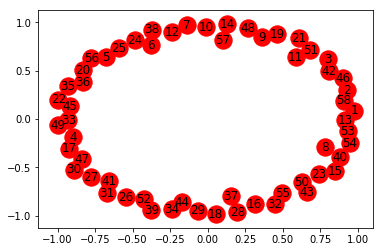

在网络中添加带权中的边...


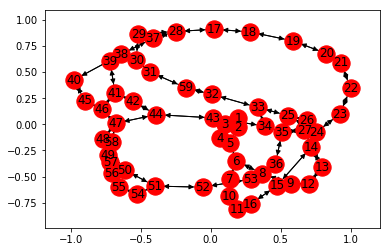

给网路设置布局...
画出网络图像：


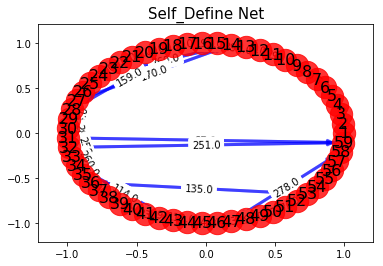

In [30]:
import math
# all_paths={}
# all_delete_edges=set()


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()



In [47]:
alpha=0.8
#用下面的代替车辆行驶100次
# alpha=0.08

In [48]:
def get_shortest_path(index,car_times,start_end_tuple,car_type):   
    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    if (start_end_tuple not in all_paths) or ( set(all_paths.get(start_end_tuple,(None,None)))&all_delete_edges):
        s,e=start_end_tuple

        all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
        #最短路径有多条时，选择节点数最少的那个最短路径
        if len( all_shortest_path)>1:
            len_min_index=np.argmin([len(each)for each in all_shortest_path])
            all_shortest_path_use=all_shortest_path[len_min_index]
        else:
            all_shortest_path_use=all_shortest_path[0]
        all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use

#         print('路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,s,e,all_shortest_path_use))
        distance=nx.shortest_path_length(G,s,e,'weight')


#         print('路径号{},车次{},{}{}源节点为{}，终点为{},最短距离：{}'.format(index,car_times,car_type,index+1,s,e, distance))
        pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
#         print('pairs_list={}\n'.format(pairs_list))
    
        all_paths[start_end_tuple]=pairs_list
#         all_paths[start_end_tuple].append(pairs_list)
    else:
        pairs_list=all_paths[start_end_tuple]
#         print('已经存在的最短路径为：路径号{},车次{},{},{}'.format(index,car_times,start_end_tuple,pairs_list))
    return  index,car_times,start_end_tuple,car_type,pairs_list

In [89]:
def judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list):   
    success=1#0是失败，1是成功
    res_temp_list=[]
    '''
    1.全部满足时，全部更新路段限制条件，并且返回最短路径和最短距离
    2.当某个路段不满足条件时，返回pair_index对应的路段，临时删除该路段，调用最短路径算法重新执行，然后在判断，直到全部满足条件或者无解时结束
    #重车时删除的路段先不恢复，等到空车时在将删除的路段恢复（相当于重新构建一次网络图，然后安装之前的策略进行），重新运行
    
    
    '''
    
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
    op=e0*math.ceil(q_div_c)
#     print('op',op)

    
#     print('约束最短路径为：',pairs_list)

    ##对于该路径中的所有路段，依次更新负荷值，全部路段满足要求时，该路径可以；
    #如果某个路段不满足要求，那么就要重新计算，并更新负荷值，直到满足要求为止。
    
    
    ###这个地方有问题，只有所有路段都满足通行要求时才能一次性更新，否则不能更新；只能重新计算最短路径然后在判断是否满足要求
    ###当然一个路段一个路段更新也是可以的，但是更新到最好必须是有解的，要是没有解的话得重新计算整条路径或者其它处理方法
    
    ##先假设都能有可行解，后面的待会考虑
    
    
    ##删除路段后也是重新计算最短路，所以还是一条路径满足所有条件时，然后才返回
#     print('预选路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,start_end_tuple[0],start_end_tuple[1],pairs_list))
    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        res_temp= op/(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
#         print('res_temp={},MSF={},FHV.iloc[pair_index]={},FD.iloc[pair_index]={},FW.iloc[pair_index]={},FF.iloc[pair_index]={}'.format(
#             MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index],
#             MSF.iloc[pair_index],
#             FHV.iloc[pair_index],
#             FD.iloc[pair_index],
#             FW.iloc[pair_index],
#             FF.iloc[pair_index]
            
            
            
#             ))
        
        res_temp_list.append(res_temp)
        
        ##可能第一个路段就大于alpha也可能是后面的路段才大于等于alpha
        if res[pair_index]+res_temp<alpha:
            pass
# #             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
#             res[pair_index]+=res_temp
# #             print('当前最短路径为:pairs_list',pairs_list)
        
#             if pair not in all_pairs_index_new.keys():
#                 all_pairs_index_new[pair]={}
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
#             else:   
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
#             print('删除该路段 {}'.format(pair))#暂时注释掉
#             print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            
#             if 
            
            G.remove_edge(*pair)
            all_delete_edges.add(pair)
            success=0
            
            break  
            
#             get_limited_shortest_path(index,start_end_tuple,car_type)
#             get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
            
#             print('添加该路段 {}\n'.format(pair))
#             G.add_edge(*pair)
#             all_delete_edges.remove(pair)
    if success:
            #成功返回最短路径；并整体更新限制条件
            for pair ,res_temp in zip(pairs_list,res_temp_list):
                    pair_index=tuple((int(each)-1 for each in pair))
                    res[pair_index]+=res_temp


                    if pair not in all_pairs_index_new.keys():
                            all_pairs_index_new[pair]={}
                            if car_type not in all_pairs_index_new[pair].keys():
                                all_pairs_index_new[pair][car_type]=[]
                                all_pairs_index_new[pair][car_type].append(index+1)
                            else:
                                all_pairs_index_new[pair][car_type].append(index+1)


                    else:   
                        if car_type not in all_pairs_index_new[pair].keys():
                            all_pairs_index_new[pair][car_type]=[]
                            all_pairs_index_new[pair][car_type].append(index+1)
                        else:
                            all_pairs_index_new[pair][car_type].append(index+1)

                
            return success, pairs_list
    else:      
        #失败返回，失败的那个路段
        return success,pair        
    

In [95]:
def get_limited_shortest_path(index,car_times,start_end_tuple,car_type): 
    index,car_times,start_end_tuple,car_type,pairs_list=get_shortest_path(index,car_times,start_end_tuple,car_type)
    success,path =judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list)
    
    ##删除某个路段之后，需要重新寻找最短路，即调用最短路径算法
    while True:
          try:
           
               if success:
                    break
               else:
                    index,car_times,start_end_tuple,car_type,pairs_list=get_shortest_path(index,car_times,start_end_tuple,car_type)
                    success,path =judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list)
          except Exception as e:
            print('error 往后车次无解',e,start_end_tuple,)
            break
    ##获取该条满足条件的最短路径之后，恢复被删除的路径
     
#             all_delete_edges.remove(pair)
     
    all_delete_edges_copy=all_delete_edges.copy()
    for pair in all_delete_edges_copy:
#         print('pairssss',pair)
        G.add_edge(*pair)
        all_delete_edges.remove(pair)
    
    #清空删除的保存路径
#     global all_delete_edges

#     all_delete_edges=set()
        
                    
                    
    return path
    

In [96]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1,Amounts1))
all_car_se['light']=list(zip(o2,d2,Amounts2))


In [97]:
#生成网络图
import math
print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

# nx.draw_networkx(G)
# plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...


In [98]:
import time

In [99]:
res=np.zeros((59,59))
all_heavy_path={}
all_pairs_index_new={}


all_paths={}
all_delete_edges=set()
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
for car_type,start_end_tuple_list in all_car_se.items():
    for index,( s ,e,amounts) in enumerate(start_end_tuple_list):
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)
        for car_times in range(amounts):
            ##index要进行修改
            
            path=get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
#             print('pathsssss',path)
            print('物料种类号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,s,e,path))
#         if index >1:
#             break
#     break
            
    #     break
print('cost time:{}s'.format(time.time()-start))
##空车1

物料种类号0,车次0，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次1，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次2，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次3，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次4，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次5，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次6，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次7，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次8，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次9，heavy1 源节点43，终点为40,最短路径为：[(43, 44), (44, 42), (42, 41), (41, 39), (39, 38), (38, 40)]
物料种类号0,车次10，heavy1 源节点43，终点为40

error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次4，heavy8 源节点46，终点为32,最短路径为：(33, 32)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次5，heavy8 源节点46，终点为32,最短路径为：(31, 59)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次6，heavy8 源节点46，终点为32,最短路径为：(33, 32)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次7，heavy8 源节点46，终点为32,最短路径为：(31, 59)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次8，heavy8 源节点46，终点为32,最短路径为：(33, 32)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次9，heavy8 源节点46，终点为32,最短路径为：(31, 59)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次10，heavy8 源节点46，终点为32,最短路径为：(33, 32)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次11，heavy8 源节点46，终点为32,最短路径为：(31, 59)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号7,车次12，heavy8 源节点46，终点为32,最短路径为：(33, 32)
error 往后车次无解 Tar

error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次47，heavy13 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次48，heavy13 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次49，heavy13 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次50，heavy13 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次51，heavy13 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次52，heavy13 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次53，heavy13 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次54，heavy13 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号12,车次55，heavy13 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9,

error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次30，heavy15 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次31，heavy15 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次32，heavy15 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次33，heavy15 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次34，heavy15 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次35，heavy15 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次36，heavy15 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次37，heavy15 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号14,车次38，heavy15 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target

error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次14，heavy23 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次15，heavy23 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次16，heavy23 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次17，heavy23 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次18，heavy23 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次19，heavy23 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次20，heavy23 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次21，heavy23 源节点48，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号22,车次22，heavy23 源节点48，终点为3,最短路径为：(14, 13)
error 往后车次无解 Target

error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次9，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次10，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次11，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次12，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次13，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次14，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次15，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次16，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号29,车次17，heavy30 源节点3，终点为8,最短路径为：(5, 6)
error 往后车次无解 Target 8 cannot be reachedfrom Source 3 (3, 8)
物料种类号

error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次16，heavy33 源节点15，终点为26,最短路径为：(27, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次17，heavy33 源节点15，终点为26,最短路径为：(25, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次18，heavy33 源节点15，终点为26,最短路径为：(27, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次19，heavy33 源节点15，终点为26,最短路径为：(25, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次20，heavy33 源节点15，终点为26,最短路径为：(27, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次21，heavy33 源节点15，终点为26,最短路径为：(25, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次22，heavy33 源节点15，终点为26,最短路径为：(27, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次23，heavy33 源节点15，终点为26,最短路径为：(25, 26)
error 往后车次无解 Target 26 cannot be reachedfrom Source 15 (15, 26)
物料种类号32,车次24，heavy33 源节点15，终点为26,最短路径为：(

error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次59，heavy37 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次60，heavy37 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次61，heavy37 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次62，heavy37 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次63，heavy37 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次64，heavy37 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次65，heavy37 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号36,车次66，heavy37 源节点9，终点为3,最短路径为：(14, 15)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号37,车次0，heavy38 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 

物料种类号39,车次61，heavy40 源节点43，终点为3,最短路径为：(43, 34)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次62，heavy40 源节点43，终点为3,最短路径为：(43, 44)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次63，heavy40 源节点43，终点为3,最短路径为：(43, 34)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次64，heavy40 源节点43，终点为3,最短路径为：(43, 44)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次65，heavy40 源节点43，终点为3,最短路径为：(43, 34)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次66，heavy40 源节点43，终点为3,最短路径为：(43, 44)
error 往后车次无解 Target 3 cannot be reachedfrom Source 43 (43, 3)
物料种类号39,车次67，heavy40 源节点43，终点为3,最短路径为：(43, 34)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号40,车次0，heavy41 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号40,车次1，heavy41 源节点9，终点为3,最短路径为：(9, 12)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号40,车次2，heavy41 源节点9，终点为3,最短

error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次5，heavy45 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次6，heavy45 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次7，heavy45 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次8，heavy45 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次9，heavy45 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次10，heavy45 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次11，heavy45 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次12，heavy45 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号44,车次13，heavy45 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 ca

error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次2，heavy52 源节点43，终点为46,最短路径为：(43, 34)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次3，heavy52 源节点43，终点为46,最短路径为：(43, 44)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次4，heavy52 源节点43，终点为46,最短路径为：(43, 34)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次5，heavy52 源节点43，终点为46,最短路径为：(43, 44)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次6，heavy52 源节点43，终点为46,最短路径为：(43, 34)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次7，heavy52 源节点43，终点为46,最短路径为：(43, 44)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次8，heavy52 源节点43，终点为46,最短路径为：(43, 34)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次9，heavy52 源节点43，终点为46,最短路径为：(43, 44)
error 往后车次无解 Target 46 cannot be reachedfrom Source 43 (43, 46)
物料种类号51,车次10，heavy52 源节点43，终点为46,最短路径为：(43, 34)


物料种类号59,车次57，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次58，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次59，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次60，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次61，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次62，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次63，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次64，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次65，heavy60 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号59,车次66，heavy60 源节点3，终点为32,最短路径为

error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次17，heavy68 源节点48，终点为8,最短路径为：(34, 33)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次18，heavy68 源节点48，终点为8,最短路径为：(41, 39)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次19，heavy68 源节点48，终点为8,最短路径为：(34, 33)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次20，heavy68 源节点48，终点为8,最短路径为：(41, 39)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次21，heavy68 源节点48，终点为8,最短路径为：(34, 33)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次22，heavy68 源节点48，终点为8,最短路径为：(41, 39)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次23，heavy68 源节点48，终点为8,最短路径为：(34, 33)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次24，heavy68 源节点48，终点为8,最短路径为：(41, 39)
error 往后车次无解 Target 8 cannot be reachedfrom Source 48 (48, 8)
物料种类号67,车次25，heavy68 源节点48，终点为8,最短路径为：(34, 33)
error 往后车次无解 Target

物料种类号0,车次0，light1 源节点40，终点为43,最短路径为：[(40, 45), (45, 46), (46, 47), (47, 44), (44, 43)]
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次1，light1 源节点40，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次2，light1 源节点40，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次3，light1 源节点40，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次4，light1 源节点40，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次5，light1 源节点40，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次6，light1 源节点40，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次7，light1 源节点40，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 40 (40, 43)
物料种类号0,车次8，light1 源节点40，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedf

error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次2，light3 源节点48，终点为31,最短路径为：(27, 14)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次3，light3 源节点48，终点为31,最短路径为：(34, 33)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次4，light3 源节点48，终点为31,最短路径为：(27, 14)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次5，light3 源节点48，终点为31,最短路径为：(34, 33)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次6，light3 源节点48，终点为31,最短路径为：(27, 14)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次7，light3 源节点48，终点为31,最短路径为：(34, 33)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次8，light3 源节点48，终点为31,最短路径为：(27, 14)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次9，light3 源节点48，终点为31,最短路径为：(34, 33)
error 往后车次无解 Target 31 cannot be reachedfrom Source 48 (48, 31)
物料种类号2,车次10，light3 源节点48，终点为31,最短路径为：(27, 14)
error 往后车次无解 Targe

error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次52，light7 源节点45，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次53，light7 源节点45，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次54，light7 源节点45，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次55，light7 源节点45，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次56，light7 源节点45，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次57，light7 源节点45，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次58，light7 源节点45，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次59，light7 源节点45，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 45 (45, 43)
物料种类号6,车次60，light7 源节点45，终点为43,最短路径为：(34, 43)
error 往后车次

error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次34，light12 源节点45，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次35，light12 源节点45，终点为32,最短路径为：(25, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次36，light12 源节点45，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次37，light12 源节点45，终点为32,最短路径为：(25, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次38，light12 源节点45，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次39，light12 源节点45，终点为32,最短路径为：(25, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次40，light12 源节点45，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次41，light12 源节点45，终点为32,最短路径为：(25, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 45 (45, 32)
物料种类号11,车次42，light12 源节点45，终点为32,最短路径为：(

error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次38，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次39，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次40，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次41，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次42，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次43，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次44，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次45，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号12,车次46，light13 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类

error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次26，light18 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次27，light18 源节点9，终点为3,最短路径为：(9, 12)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次28，light18 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次29，light18 源节点9，终点为3,最短路径为：(9, 12)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次30，light18 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次31，light18 源节点9，终点为3,最短路径为：(9, 12)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次32，light18 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次33，light18 源节点9，终点为3,最短路径为：(9, 12)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)
物料种类号17,车次34，light18 源节点9，终点为3,最短路径为：(9, 8)
error 往后车次无解 Target 3 cannot be reachedfrom Source 9 (9, 3)


error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次12，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次13，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次14，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次15，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次16，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次17，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次18，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次19，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reachedfrom Source 3 (3, 48)
物料种类号22,车次20，light23 源节点3，终点为48,最短路径为：(5, 6)
error 往后车次无解 Target 48 cannot be reac

error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次31，light25 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次32，light25 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次33，light25 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次34，light25 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次35，light25 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次36，light25 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次37，light25 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次38，light25 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号24,车次39，light25 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target

error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次21，light27 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次22，light27 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次23，light27 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次24，light27 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次25，light27 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次26，light27 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次27，light27 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次28，light27 源节点48，终点为3,最短路径为：(41, 39)
error 往后车次无解 Target 3 cannot be reachedfrom Source 48 (48, 3)
物料种类号26,车次29，light27 源节点48，终点为3,最短路径为：(34, 33)
error 往后车次无解 Target

error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次50，light32 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次51，light32 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次52，light32 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次53，light32 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次54，light32 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次55，light32 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次56，light32 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次57，light32 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号31,车次58，light32 源节点43，终点为15,最短路径为：(

error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次27，light38 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次28，light38 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次29，light38 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次30，light38 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次31，light38 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次32，light38 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次33，light38 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次34，light38 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号37,车次35，light38 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target

物料种类号39,车次65，light40 源节点3，终点为43,最短路径为：(5, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 3 (3, 43)
物料种类号39,车次66，light40 源节点3，终点为43,最短路径为：(5, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 3 (3, 43)
物料种类号39,车次67，light40 源节点3，终点为43,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号40,车次0，light41 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号40,车次1，light41 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 9 cannot be reachedfrom Source 3 (3, 9)
物料种类号40,车次2，light41 源节点3，终点为9,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号41,车次0，light42 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号41,车次1，light42 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号41,车次2，light42 源节点3，终点为32,最短路径为：(5, 6)
error 往后车次无解 Target 32 cannot be reachedfrom Source 3 (3, 32)
物料种类号41,车次3，light42 源节点3，终点为32,最短路径为：(5, 6)
error 往后

error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次8，light47 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次9，light47 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次10，light47 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次11，light47 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次12，light47 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次13，light47 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次14，light47 源节点43，终点为15,最短路径为：(43, 44)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次15，light47 源节点43，终点为15,最短路径为：(43, 34)
error 往后车次无解 Target 15 cannot be reachedfrom Source 43 (43, 15)
物料种类号46,车次16，light47 源节点43，终点为15,最短路径为：(43

error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次33，light52 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次34，light52 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次35，light52 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次36，light52 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次37，light52 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次38，light52 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次39，light52 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次40，light52 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号51,车次41，light52 源节点46，终点为43,最短路径为：(

error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号53,车次25，light54 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号53,车次26，light54 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号53,车次27，light54 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号53,车次28，light54 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号54,车次0，light55 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号54,车次1，light55 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号54,车次2，light55 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号54,车次3，light55 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号54,车次4，light55 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解

物料种类号56,车次16，light57 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次17，light57 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次18，light57 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次19，light57 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次20，light57 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次21，light57 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次22，light57 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次23，light57 源节点46，终点为43,最短路径为：(44, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (46, 43)
物料种类号56,车次24，light57 源节点46，终点为43,最短路径为：(34, 43)
error 往后车次无解 Target 43 cannot be reachedfrom Source 46 (

error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次18，light60 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次19，light60 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次20，light60 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次21，light60 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次22，light60 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次23，light60 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次24，light60 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次25，light60 源节点32，终点为3,最短路径为：(32, 33)
error 往后车次无解 Target 3 cannot be reachedfrom Source 32 (32, 3)
物料种类号59,车次26，light60 源节点32，终点为3,最短路径为：(31, 30)
error 往后车次无解 Target

error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次24，light61 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次25，light61 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次26，light61 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次27，light61 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次28，light61 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次29，light61 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次30，light61 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次31，light61 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号60,车次32，light61 源节点46，终点为32,最短路径为：(

error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次16，light65 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次17，light65 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次18，light65 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次19，light65 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次20，light65 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次21，light65 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次22，light65 源节点46，终点为32,最短路径为：(34, 33)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次23，light65 源节点46，终点为32,最短路径为：(27, 14)
error 往后车次无解 Target 32 cannot be reachedfrom Source 46 (46, 32)
物料种类号64,车次24，light65 源节点46，终点为32,最短路径为：(

error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次15，light69 源节点8，终点为43,最短路径为：(8, 9)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次16，light69 源节点8，终点为43,最短路径为：(8, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次17，light69 源节点8，终点为43,最短路径为：(8, 9)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次18，light69 源节点8，终点为43,最短路径为：(8, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次19，light69 源节点8，终点为43,最短路径为：(8, 9)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次20，light69 源节点8，终点为43,最短路径为：(8, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次21，light69 源节点8，终点为43,最短路径为：(8, 9)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次22，light69 源节点8，终点为43,最短路径为：(8, 6)
error 往后车次无解 Target 43 cannot be reachedfrom Source 8 (8, 43)
物料种类号68,车次23，light69 源节点8，终点为43,最短路径为：(8, 9)
error 往后车次无解 Target 43 cannot be reac

In [85]:
res[res>0]

array([0.79456182, 0.79726901, 0.79456182, 0.79726901, 0.79456182,
       0.79726901, 0.03925433, 0.79726901, 0.04196153, 0.03925433,
       0.79726901, 0.79726901, 0.79726901, 0.79726901, 0.04196153,
       0.03925433, 0.04196153, 0.03925433, 0.79523862, 0.79726901,
       0.79523862, 0.79726901, 0.79523862, 0.78711703, 0.04196153,
       0.79591542, 0.79591542, 0.04196153, 0.04196153, 0.03925433,
       0.03180954, 0.04196153, 0.04196153, 0.03180954, 0.04196153,
       0.03180954, 0.04196153, 0.03180954, 0.04196153, 0.03180954,
       0.04196153, 0.03180954, 0.04196153, 0.03180954, 0.03180954,
       0.04196153, 0.79523862, 0.79591542, 0.79591542, 0.79523862,
       0.79523862, 0.79591542, 0.03180954, 0.04196153, 0.03180954,
       0.04196153, 0.03180954, 0.03180954, 0.77358105, 0.79523862,
       0.79523862, 0.79523862, 0.76342907, 0.79523862, 0.79659221,
       0.79591542, 0.79659221, 0.03519354, 0.79591542, 0.03316314,
       0.03519354, 0.03316314, 0.03519354, 0.77358105, 0.79862

生成一个空的有向图
为这个网络添加节点...


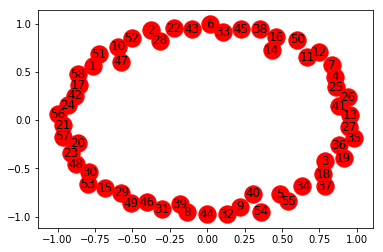

在网络中添加带权中的边...


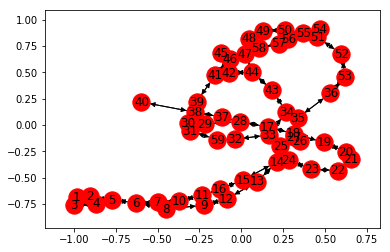

给网路设置布局...
画出网络图像：


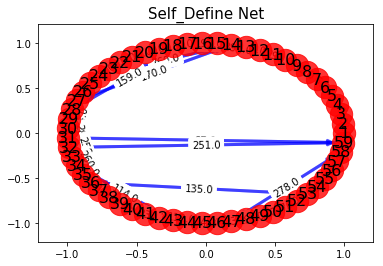

In [16]:

#自定义网络
# row=np.array([0,0,0,1,2,3,6])
# col=np.array([1,2,3,4,5,6,7])
# value=np.array([1,2,1,8,1,3,5])

# row=np.array([1,1,2,2,3,3,4,4,5,6,7,8,8,   2,9,3,9,4,10,5,6,6,7,8,9,10])
# col=np.array([2,9,3,9,4,10,5,6,6,7,8,9,10,1,1,2,2,3,3,4,4,5,6,7,8,8])
# value=np.array([4,4,1,4,4,1,3,8,1,2,2,1,3,4,4,1,4,4,1,3,8,1,2,2,1,3])



# for 


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()




In [68]:
# help(nx.dijkstra_path)

In [69]:
# G.remove_edge(4,10)#删除有向边3->10,反向边10->3仍然存在
# G.add_edge(*(4,10))#删除有向边3->10,反向边10->3仍然存在
###添加4-10路段测试使用

In [70]:
# #把节点画出来  
# nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
# #把边画出来  
# nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
# #把节点的标签画出来  
# nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


# print('画出网络图像：')
# # nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


# #把边权重画出来  
# edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
# nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

# plt.title('Self_Define Net',fontsize=15)
# plt.show()


In [17]:
G.number_of_nodes()

59

In [18]:
G.number_of_edges()

136

In [23]:
'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
source=3
target=45
path=nx.dijkstra_path(G, source=source, target=target)
print('节点{}到{}的路径：'.format(source,target), path)
print('dijkstra方法寻找最短距离：')
distance=nx.dijkstra_path_length(G, source=2, target=7)
print('节点{}到{}的距离为：'.format(source,target), distance)

dijkstra方法寻找最短路径：
节点3到45的路径： [3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 34, 43, 44, 42, 41, 46, 45]
dijkstra方法寻找最短距离：
节点3到45的距离为： 856.0


In [74]:
print('通用方法寻找最短路径：')
p=nx.shortest_path(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), p)
distance=nx.shortest_path_length(G,source,target,'weight')
print('源节点为{}，终点为{},最短距离：'.format(source,target), distance)


通用方法寻找最短路径：
源节点2，终点为7： [2, 3, 10, 8, 7]
源节点为2，终点为7,最短距离： 7


In [75]:
print('通用方法寻找所有最短路径：')
all_shortest_path=nx.all_shortest_paths(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), list(all_shortest_path))

通用方法寻找所有最短路径：
源节点2，终点为7： [[2, 3, 10, 8, 7], [2, 9, 8, 7]]


In [76]:
##这里想到一个算法：就是对每辆车计算起点到终点的最短路径;
#    1.对第一辆车计算起点到终点的最短路径
#    2.计算每个经过路段的道路容量
#         如果存在道路容量超标，则将第一个超标的路段断开，重复步骤1，重复步骤2，直到找出满足道路容量的最短路径；
#         否则输出无解
#    3.恢复断开的路径，对剩余的车重复步骤1、2直到所有的车辆起点终点计算完毕

In [77]:
# res[(2,3)]=1

In [78]:
alpha=0.8

In [79]:
a=np.array([2,8,8,5])
max(a)

8

In [80]:
import math

def get_limited_shortest_path(index,start_end_tuple,car_type):   
    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    s,e=start_end_tuple
    
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    #最短路径有多条时，选择节点数最少的那个最短路径
    if len( all_shortest_path)>1:
        len_min_index=np.argmin([len(each)for each in all_shortest_path])
        all_shortest_path_use=all_shortest_path[len_min_index]
    else:
        all_shortest_path_use=all_shortest_path[0]
        
    

    
    all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use
    
        
    print('{}{} 源节点{}，终点为{},最短路径为：{}'.format(car_type,index+1,s,e,all_shortest_path_use))
    distance=nx.shortest_path_length(G,s,e,'weight')
    print('{}{}源节点为{}，终点为{},最短距离：{}'.format(car_type,index+1,s,e, distance))
    pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
    print('pairs_list={}\n'.format(pairs_list))
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
    op=e0*math.ceil(q_div_c)

    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        res_temp= op/(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
        if res[pair_index]+res_temp<alpha:
#             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
            res[pair_index]+=res_temp
    
            if pair not in all_pairs_index_new.keys():
                all_pairs_index_new[pair]={}
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
            else:   
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
        
        
        
        
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
            print('删除该路段 {}'.format(pair))
            print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            G.remove_edge(*pair)
            get_limited_shortest_path(index,start_end_tuple,car_type)
            print('添加该路段 {}\n'.format(pair))
            G.add_edge(*pair)

In [81]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1))
all_car_se['light']=list(zip(o2,d2))

In [82]:
all_car_se

{'heavy': [(2, 5), (2, 7), (1, 5), (10, 5), (5, 3), (3, 5), (10, 4)],
 'light': [(5, 2), (7, 2), (5, 1), (5, 10), (3, 5), (5, 3), (4, 10)]}

In [83]:
import time

In [84]:
res=np.zeros((10,10))
all_heavy_path={}
all_pairs_index_new={}
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
for car_type,start_end_tuple_list in all_car_se.items():
    for index,( s ,e) in enumerate(start_end_tuple_list):
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)

        get_limited_shortest_path(index,start_end_tuple,car_type)
    #     break
# print('cost time:{}s'.format(time.time()-start))
##空车1

    

heavy1 源节点2，终点为5,最短路径为：[2, 3, 4, 5]
heavy1源节点为2，终点为5,最短距离：8
pairs_list=[(2, 3), (3, 4), (4, 5)]

heavy2 源节点2，终点为7,最短路径为：[2, 9, 8, 7]
heavy2源节点为2，终点为7,最短距离：7
pairs_list=[(2, 9), (9, 8), (8, 7)]

heavy3 源节点1，终点为5,最短路径为：[1, 9, 8, 7, 6, 5]
heavy3源节点为1，终点为5,最短距离：10
pairs_list=[(1, 9), (9, 8), (8, 7), (7, 6), (6, 5)]

heavy4 源节点10，终点为5,最短路径为：[10, 3, 4, 5]
heavy4源节点为10，终点为5,最短距离：8
pairs_list=[(10, 3), (3, 4), (4, 5)]

heavy5 源节点5，终点为3,最短路径为：[5, 4, 3]
heavy5源节点为5，终点为3,最短距离：7
pairs_list=[(5, 4), (4, 3)]

heavy6 源节点3，终点为5,最短路径为：[3, 4, 5]
heavy6源节点为3，终点为5,最短距离：7
pairs_list=[(3, 4), (4, 5)]

heavy7 源节点10，终点为4,最短路径为：[10, 3, 4]
heavy7源节点为10，终点为4,最短距离：5
pairs_list=[(10, 3), (3, 4)]

light1 源节点5，终点为2,最短路径为：[5, 4, 3, 2]
light1源节点为5，终点为2,最短距离：8
pairs_list=[(5, 4), (4, 3), (3, 2)]

light2 源节点7，终点为2,最短路径为：[7, 8, 9, 2]
light2源节点为7，终点为2,最短距离：7
pairs_list=[(7, 8), (8, 9), (9, 2)]

light3 源节点5，终点为1,最短路径为：[5, 6, 7, 8, 9, 1]
light3源节点为5，终点为1,最短距离：10
pairs_list=[(5, 6), (6, 7), (7, 8), (8, 9), (9, 1)]

light4 源节

In [85]:
res[2,3]

0.13966373163334636

In [86]:
res

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.01939774, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01939774, 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0969887 ],
       [0.        , 0.        , 0.13966373, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.12026599, 0.        ,
        0.07759096, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.07759096, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.0969887 , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [87]:
# all_heavy_path

In [88]:
all_pairs_index_new

{(2, 3): {'heavy': [1]},
 (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
 (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
 (2, 9): {'heavy': [2]},
 (9, 8): {'heavy': [2, 3]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5], 'light': [1, 4, 6]},
 (4, 3): {'heavy': [5], 'light': [1, 4, 6, 7]},
 (3, 2): {'light': [1]},
 (7, 8): {'light': [2, 3]},
 (8, 9): {'light': [2, 3]},
 (9, 2): {'light': [2]},
 (5, 6): {'light': [3]},
 (6, 7): {'light': [3]},
 (9, 1): {'light': [3]},
 (3, 10): {'light': [4, 7]}}

In [89]:
res

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.01939774, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01939774, 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0969887 ],
       [0.        , 0.        , 0.13966373, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.12026599, 0.        ,
        0.07759096, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.07759096, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.0969887 , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [93]:
a=res
a=a+1

In [94]:
a

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.07759096, 1.        ],
       [1.        , 1.        , 1.01939774, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.01939774, 1.        ],
       [1.        , 1.01939774, 1.        , 1.13966373, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.0969887 ],
       [1.        , 1.        , 1.13966373, 1.        , 1.12026599,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.12026599, 1.        ,
        1.07759096, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.07759096,
        1.        , 1.07759096, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.07759096, 1.        , 1.0969887 , 1.        , 1.        ],
       [1.        , 1.        , 1.       

In [23]:
##寻找每辆重车的最短路径

In [147]:
all_heavy_path={}
for index,( s ,e) in enumerate(zip(o1,d1)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))

    all_heavy_path[index+1]=all_shortest_path
    print('重车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e,all_shortest_path))


重车1 源节点2，终点为5,最短路径为：[[2, 3, 4, 5]]

重车2 源节点2，终点为7,最短路径为：[[2, 3, 10, 8, 7], [2, 9, 8, 7]]

重车3 源节点1，终点为5,最短路径为：[[1, 9, 8, 7, 6, 5]]

重车4 源节点10，终点为5,最短路径为：[[10, 3, 4, 5], [10, 8, 7, 6, 5]]

重车5 源节点5，终点为3,最短路径为：[[5, 4, 3]]

重车6 源节点3，终点为5,最短路径为：[[3, 4, 5]]

重车7 源节点10，终点为4,最短路径为：[[10, 3, 4]]



In [148]:
all_heavy_path

{1: [[2, 3, 4, 5]],
 2: [[2, 3, 10, 8, 7], [2, 9, 8, 7]],
 3: [[1, 9, 8, 7, 6, 5]],
 4: [[10, 3, 4, 5], [10, 8, 7, 6, 5]],
 5: [[5, 4, 3]],
 6: [[3, 4, 5]],
 7: [[10, 3, 4]]}

In [149]:
all_light_path={}
for index, (s ,e) in enumerate(zip(o2,d2)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    print('空车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e, all_shortest_path))
    all_light_path[index+1]=all_shortest_path

空车1 源节点5，终点为2,最短路径为：[[5, 4, 3, 2]]

空车2 源节点7，终点为2,最短路径为：[[7, 8, 9, 2], [7, 8, 10, 3, 2]]

空车3 源节点5，终点为1,最短路径为：[[5, 6, 7, 8, 9, 1]]

空车4 源节点5，终点为10,最短路径为：[[5, 6, 7, 8, 10], [5, 4, 3, 10]]

空车5 源节点3，终点为5,最短路径为：[[3, 4, 5]]

空车6 源节点5，终点为3,最短路径为：[[5, 4, 3]]

空车7 源节点4，终点为10,最短路径为：[[4, 3, 10]]



In [150]:
all_light_path

{1: [[5, 4, 3, 2]],
 2: [[7, 8, 9, 2], [7, 8, 10, 3, 2]],
 3: [[5, 6, 7, 8, 9, 1]],
 4: [[5, 6, 7, 8, 10], [5, 4, 3, 10]],
 5: [[3, 4, 5]],
 6: [[5, 4, 3]],
 7: [[4, 3, 10]]}

In [151]:
# 对每一个路段i,j都要保证经过该路段运输的所有物料的通行能力

In [152]:
all_heavy_path_pair={}
all_heavy_pairs_index={}
all_heavy_pairs=[]
for index,each in all_heavy_path.items():
    all_heavy_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_heavy_path_pair[index].append(pair_list)
#         all_heavy_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_heavy_pairs_index.keys():
                all_heavy_pairs_index[each_pair]={'heavy':[]}
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            else:
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            
        #目前多个最短路径先只用第一个
        break 


In [153]:
all_heavy_pairs_index

{(2, 3): {'heavy': [1, 2]},
 (3, 4): {'heavy': [1, 4, 6, 7]},
 (4, 5): {'heavy': [1, 4, 6]},
 (3, 10): {'heavy': [2]},
 (10, 8): {'heavy': [2]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (9, 8): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5]},
 (4, 3): {'heavy': [5]}}

In [154]:
all_heavy_path_pair

{1: [[(2, 3), (3, 4), (4, 5)]],
 2: [[(2, 3), (3, 10), (10, 8), (8, 7)]],
 3: [[(1, 9), (9, 8), (8, 7), (7, 6), (6, 5)]],
 4: [[(10, 3), (3, 4), (4, 5)]],
 5: [[(5, 4), (4, 3)]],
 6: [[(3, 4), (4, 5)]],
 7: [[(10, 3), (3, 4)]]}

In [155]:
all_heavy_pairs_index

{(2, 3): {'heavy': [1, 2]},
 (3, 4): {'heavy': [1, 4, 6, 7]},
 (4, 5): {'heavy': [1, 4, 6]},
 (3, 10): {'heavy': [2]},
 (10, 8): {'heavy': [2]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (9, 8): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5]},
 (4, 3): {'heavy': [5]}}

In [156]:
# all_heavy_pairs_index[(2,3)]['light']=[]
# all_heavy_pairs_index[(2,3)]['light'].append(777)

In [157]:
all_heavy_pairs_index

{(2, 3): {'heavy': [1, 2]},
 (3, 4): {'heavy': [1, 4, 6, 7]},
 (4, 5): {'heavy': [1, 4, 6]},
 (3, 10): {'heavy': [2]},
 (10, 8): {'heavy': [2]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (9, 8): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5]},
 (4, 3): {'heavy': [5]}}

In [158]:
all_light_path_pair={}
all_light_pairs_index=all_heavy_pairs_index
all_light_pairs=[]
for index,each in all_light_path.items():
    all_light_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_light_path_pair[index].append(pair_list)
#         all_light_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_light_pairs_index.keys():
                all_light_pairs_index[each_pair]={}
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
                    
            else:
# #                 all_light_pairs_index[each_pair]['light']=[]
#                 all_light_pairs_index[each_pair]['light'].append(index)
    
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
            
        #目前多个最短路径先只用第一个
        break 

    

In [159]:
all_light_path_pair

{1: [[(5, 4), (4, 3), (3, 2)]],
 2: [[(7, 8), (8, 9), (9, 2)]],
 3: [[(5, 6), (6, 7), (7, 8), (8, 9), (9, 1)]],
 4: [[(5, 6), (6, 7), (7, 8), (8, 10)]],
 5: [[(3, 4), (4, 5)]],
 6: [[(5, 4), (4, 3)]],
 7: [[(4, 3), (3, 10)]]}

In [160]:
all_light_pairs_index

{(2, 3): {'heavy': [1, 2]},
 (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
 (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
 (3, 10): {'heavy': [2], 'light': [7]},
 (10, 8): {'heavy': [2]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (9, 8): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5], 'light': [1, 6]},
 (4, 3): {'heavy': [5], 'light': [1, 6, 7]},
 (3, 2): {'light': [1]},
 (7, 8): {'light': [2, 3, 4]},
 (8, 9): {'light': [2, 3]},
 (9, 2): {'light': [2]},
 (5, 6): {'light': [3, 4]},
 (6, 7): {'light': [3, 4]},
 (9, 1): {'light': [3]},
 (8, 10): {'light': [4]}}

In [161]:
all_heavy_pairs_index

{(2, 3): {'heavy': [1, 2]},
 (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
 (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
 (3, 10): {'heavy': [2], 'light': [7]},
 (10, 8): {'heavy': [2]},
 (8, 7): {'heavy': [2, 3]},
 (1, 9): {'heavy': [3]},
 (9, 8): {'heavy': [3]},
 (7, 6): {'heavy': [3]},
 (6, 5): {'heavy': [3]},
 (10, 3): {'heavy': [4, 7]},
 (5, 4): {'heavy': [5], 'light': [1, 6]},
 (4, 3): {'heavy': [5], 'light': [1, 6, 7]},
 (3, 2): {'light': [1]},
 (7, 8): {'light': [2, 3, 4]},
 (8, 9): {'light': [2, 3]},
 (9, 2): {'light': [2]},
 (5, 6): {'light': [3, 4]},
 (6, 7): {'light': [3, 4]},
 (9, 1): {'light': [3]},
 (8, 10): {'light': [4]}}

In [162]:
# {(2, 3): {'heavy': [1, 2]},
#  (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
#  (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
#  (3, 10): {'heavy': [2], 'light': [7]},
#  (10, 8): {'heavy': [2]},
#  (8, 7): {'heavy': [2, 3]},
#  (1, 9): {'heavy': [3]},
#  (9, 8): {'heavy': [3]},
#  (7, 6): {'heavy': [3]},
#  (6, 5): {'heavy': [3]},
 
#  (10, 3): {'heavy': [4, 7]},
#  (5, 4): {'heavy': [5], 'light': [1, 6]},####
#  (4, 3): {'heavy': [5], 'light': [1, 6, 7]},####
#  (3, 2): {'light': [1]},
#  (7, 8): {'light': [2, 3, 4]},####
#  (8, 9): {'light': [2, 3]},####
#  (9, 2): {'light': [2]},
#  (5, 6): {'light': [3, 4]},####
#  (6, 7): {'light': [3, 4]},####
#  (9, 1): {'light': [3]},
#  (8, 10): {'light': [4]}}

In [163]:
##开始计算每个路段通行能力

In [164]:
all_pairs_index=all_heavy_pairs_index

In [165]:
# MSF*FHV*FD*FW*FF

In [166]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 



In [167]:
# (2, 3) {'heavy': [1, 2]}
# (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]}
# (4, 5) {'heavy': [1, 4, 6], 'light': [5]}
# (3, 10) {'heavy': [2], 'light': [7]}

In [168]:
E.head(20)

1    2.5
2    2.5
3      2
4      2
5    1.5
6    1.5
7    2.5
Name: G, dtype: object

In [169]:
e0=E.iloc[[1,3,5]].values

In [170]:
q0=Q.iloc[[1,3,5]].values

In [171]:
c0=cap.iloc[[1,3,5]].values

In [172]:
import math

In [173]:
e0

array([2.5, 2, 1.5], dtype=object)

In [174]:
q0

array([11.9444444444444, 99.4305555555556, 4.44444444444444], dtype=object)

In [175]:
e0*q0

array([29.861111111111, 198.8611111111112, 6.666666666666661],
      dtype=object)

In [176]:
e0*np.array([ math.ceil(each ) for each in q0/c0])

array([2.5, 10, 1.5], dtype=object)

In [177]:
MSF.iloc[(2,3)]

420

In [178]:
MSF

,1,2,3,4,5,6,7,8,9,10
0,1,420,1,1,1,1,1,1,420,1
1,420,1,420,1,1,1,1,1,420,1
2,1,420,1,420,1,1,1,1,1,420
3,1,1,420,1,420,420,1,1,1,1
4,1,1,1,420,1,420,1,1,1,1
5,1,1,1,420,420,1,420,1,1,1
6,1,1,1,1,1,420,1,420,1,1
7,1,1,1,1,1,1,420,1,420,420
8,420,420,1,1,1,1,1,420,1,1
9,1,1,420,1,1,1,1,420,1,1


In [181]:
import math
for pair,car_id in all_pairs_index.items():
#     if len(car_id)==1:#重车和空车只有一个经过该路段
        res=0
        for car,num in car_id.items():
#             res=0
            
            num_index=[each-1 for each in num]
            e0=E.iloc[num_index].values
            q0=Q.iloc[num_index].values
            c0=cap.iloc[num_index].values
            q_div_c=q0/c0
#             print('car',tuple(car))
            pair_index=tuple((int(each)-1 for each in pair))
#             print(tuple(pair_index))
            
            res+=sum(e0*np.array([math.ceil(each) for each in q_div_c]))/(
                MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
            
        print('pair',pair,car_id,res,res<0.8)
                
        pass
#     elif len(car_id)==2:#重车和轻车都要经过该路段
#             pass
#     print(pair,car_id)

pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
pair (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]} 0.13966373163334636 True
pair (4, 5) {'heavy': [1, 4, 6], 'light': [5]} 0.12026599112871492 True
pair (3, 10) {'heavy': [2], 'light': [7]} 0.03879548100926288 True
pair (10, 8) {'heavy': [2]} 0.01939774050463144 True
pair (8, 7) {'heavy': [2, 3]} 0.0969887025231572 True
pair (1, 9) {'heavy': [3]} 0.07759096201852576 True
pair (9, 8) {'heavy': [3]} 0.07759096201852576 True
pair (7, 6) {'heavy': [3]} 0.07759096201852576 True
pair (6, 5) {'heavy': [3]} 0.07759096201852576 True
pair (10, 3) {'heavy': [4, 7]} 0.0969887025231572 True
pair (5, 4) {'heavy': [5], 'light': [1, 6]} 0.04267502911018917 True
pair (4, 3) {'heavy': [5], 'light': [1, 6, 7]} 0.06207276961482061 True
pair (3, 2) {'light': [1]} 0.01939774050463144 True
pair (7, 8) {'light': [2, 3, 4]} 0.17457966454168294 True
pair (8, 9) {'light': [2, 3]} 0.0969887025231572 True
pair (9, 2) {'light': [2]} 0.01939774050463144 True
pair

In [182]:
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# pair (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]} 0.13966373163334636 True
# pair (4, 5) {'heavy': [1, 4, 6], 'light': [5]} 0.12026599112871492 True
# pair (3, 10) {'heavy': [2], 'light': [7]} 0.03879548100926288 True
# pair (10, 8) {'heavy': [2]} 0.01939774050463144 True
# pair (8, 7) {'heavy': [2, 3]} 0.0969887025231572 True
# pair (1, 9) {'heavy': [3]} 0.07759096201852576 True
# pair (9, 8) {'heavy': [3]} 0.07759096201852576 True
# pair (7, 6) {'heavy': [3]} 0.07759096201852576 True
# pair (6, 5) {'heavy': [3]} 0.07759096201852576 True
# pair (10, 3) {'heavy': [4, 7]} 0.0969887025231572 True
# pair (5, 4) {'heavy': [5], 'light': [1, 6]} 0.04267502911018917 True
# pair (4, 3) {'heavy': [5], 'light': [1, 6, 7]} 0.06207276961482061 True
# pair (3, 2) {'light': [1]} 0.01939774050463144 True
# pair (7, 8) {'light': [2, 3, 4]} 0.17457966454168294 True
# pair (8, 9) {'light': [2, 3]} 0.0969887025231572 True
# pair (9, 2) {'light': [2]} 0.01939774050463144 True
# pair (5, 6) {'light': [3, 4]} 0.15518192403705153 True
# pair (6, 7) {'light': [3, 4]} 0.15518192403705153 True
# pair (9, 1) {'light': [3]} 0.07759096201852576 True
# pair (8, 10) {'light': [4]} 0.07759096201852576 True

In [94]:
temp=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])


In [95]:
temp2=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])

In [96]:
temp==temp2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [97]:
temp[1,2]

0.03879548

In [98]:
temp[2,3]

0.13966373

In [138]:
temp[3,4]

0.12026599

In [183]:
temp[7,9]

0.07759096

In [56]:
# 题目要求：	a说我不是小偷；b说c是小偷；c说小偷肯定是d；d说c胡说！

# 实现功能：判断小偷是谁

def thief_is():
    for thief in ('a', 'b', 'c', 'd'):
        sum = ('a' != thief) + (thief == 'c') + \
            (thief == 'd') + (thief != 'd')
        ##一个小偷，三个说真话的，加起来是三
        if sum == 3:
            print("thief is %s"%thief)
thief_is()


thief is c


In [57]:
for honest in ('baobao','xingxing','lele','qiangqiang'):
    sum=()

In [22]:
G=nx.Graph()
G.add_path([0,1,2])
G.add_path([0,10,2])
print([p for p in nx.all_shortest_paths(G,source=0,target=2)])

[[0, 1, 2], [0, 10, 2]]


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
#         G.add_edge(i, j)
        G.add_weighted_edges_from([(row[i],col[i],value[i])])
 
nx.draw(G)
plt.show()


NameError: name 'row' is not defined

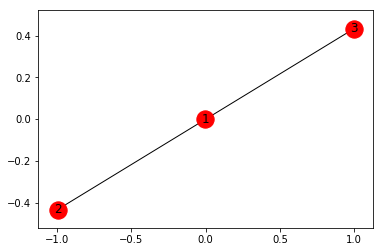

In [48]:
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(1,3)])
nx.draw_networkx(G)
plt.show()